[0.11947769639777937, 0.11793261662234941, 0.11734820062195886, 0.10107577260922207, 0.09573239474696507, 0.08770684907626253, 0.0853372401784768, 0.08077102398855639, 0.061693661537138574, 0.05140449216686197, 0.042572859182827605, 0.03894719287160124]
[0.49802163008097655, 0.36387028519646886, 0.13035153006590058, 0.001014476138254987, 0.001011427173399046, 0.0010022797847089092, 0.0009952034042931622, 0.0008971997850273067, 0.0008146382524481165, 0.0007397043196760622, 0.0006716860449519, 0.0006099397538946183]
[0.4958521318557149, 0.4957531130371115, 0.0008395929071989571, 0.0008394625618867517, 0.0008394624547609735, 0.0008394624547609735, 0.0008394624547609735, 0.0008394624547609735, 0.0008394624547609735, 0.0008394624547609735, 0.0008394624547609735, 0.0008394624547609735]
[0.4553491119502889, 0.23390439588618248, 0.09335196574790279, 0.05218300171596266, 0.021591875517115992, 0.020999946141154677, 0.020946163868749375, 0.02066923615860061, 0.020372282030714936, 0.02035682090892

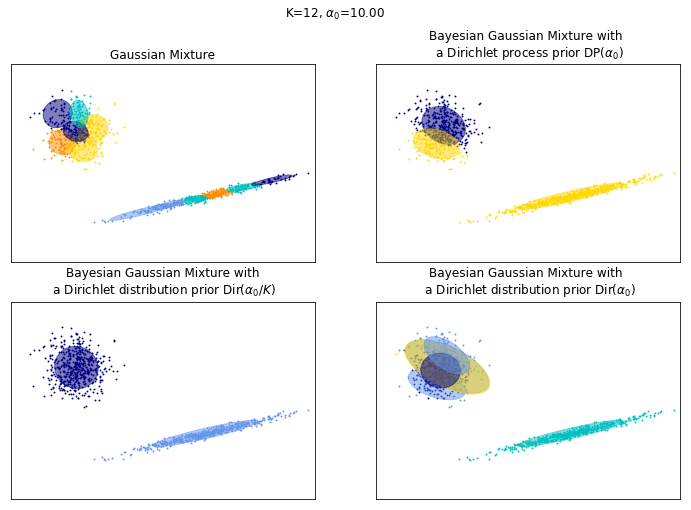

In [11]:
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])


def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 2, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-9., 5.)
    plt.ylim(-3., 6.)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)


# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
fig = plt.figure(figsize=[12,8])
C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

i = -1
# Fit a Gaussian mixture with EM using five components

alpha = 10.0
K = 12

title = 'K=%d, $\\alpha_0$=%.2f'%(K,alpha)
plt.suptitle(title)

i+=1
dpgmm = gmm = mixture.GaussianMixture(n_components=K, covariance_type='full').fit(X)
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, i,
             'Gaussian Mixture')
print sorted(dpgmm.weights_)[::-1]

# Fit a Dirichlet process Gaussian mixture using five components

i+=1
dpgmm = mixture.BayesianGaussianMixture(n_components=K,
                                        covariance_type='full',
                                        weight_concentration_prior=alpha,
                                       weight_concentration_prior_type = 'dirichlet_process').fit(X)
plot_results(X, dpgmm.predict(X), dpgmm.means_, dpgmm.covariances_, i,
             'Bayesian Gaussian Mixture with \n a Dirichlet process prior DP($\\alpha_0$)')
print sorted(dpgmm.weights_)[::-1]

i+=1
dpgmm = mixture.BayesianGaussianMixture(n_components=K,
                                        covariance_type='full',
                                        weight_concentration_prior_type = 'dirichlet_distribution',
                                        weight_concentration_prior = alpha/K).fit(X)
plot_results(X, dpgmm.predict(X), dpgmm.means_, dpgmm.covariances_, i,
             'Bayesian Gaussian Mixture with\n a Dirichlet distribution prior Dir($\\alpha_0/K$)')
print sorted(dpgmm.weights_)[::-1]

i+=1
dpgmm = mixture.BayesianGaussianMixture(n_components=K,
                                        covariance_type='full',
                                        weight_concentration_prior_type = 'dirichlet_distribution',
                                        weight_concentration_prior = alpha).fit(X)
plot_results(X, dpgmm.predict(X), dpgmm.means_, dpgmm.covariances_, i,
             'Bayesian Gaussian Mixture with \n a Dirichlet distribution prior Dir($\\alpha_0$)')
print sorted(dpgmm.weights_)[::-1]


plt.show()



In [23]:
N = 5000
D = 2
X = np.random.normal(size=(N,D))
L = np.linalg.norm(X,axis=1,keepdims=1)
Xn = X/L

V=  np.mean(np.linalg.norm(Xn,axis=1)**2)
# print V/np.pi
# print V

1.0


In [93]:
import edward as ed
import edward.models as edm
import tensorflow as tf
import numpy as np
import pymisca.numpy_extra as pynp
# import tensor
import pymisca.util as pyutil
import pymisca.vis_util as pyvis
tf.contrib.distributions.Normal??

is in ipython: 1
is in ipython: 1
[WARN] pymisca.vis_util cannot find network


In [608]:
# Copyright 2016 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#        http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================
"""The Normal (Gaussian) distribution class."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import math

from tensorflow.python.framework import constant_op
from tensorflow.python.framework import dtypes
from tensorflow.python.framework import ops
from tensorflow.python.framework import tensor_shape
from tensorflow.python.ops import array_ops
from tensorflow.python.ops import check_ops
from tensorflow.python.ops import math_ops
from tensorflow.python.ops import nn
from tensorflow.python.ops import random_ops
from tensorflow.python.ops.distributions import distribution
from tensorflow.python.ops.distributions import kullback_leibler
from tensorflow.python.ops.distributions import special_math


__all__ = [
        "Normal",
        "NormalWithSoftplusScale",
]


class test(distribution.Distribution):
    """The Normal distribution with location `loc` and `scale` parameters.

    #### Mathematical details

    The probability density function (pdf) is,

    ```none
    pdf(x; mu, sigma) = exp(-0.5 (x - mu)**2 / sigma**2) / Z
    Z = (2 pi sigma**2)**0.5
    ```

    where `loc = mu` is the mean, `scale = sigma` is the std. deviation, and, `Z`
    is the normalization constant.

    The Normal distribution is a member of the [location-scale family](
    https://en.wikipedia.org/wiki/Location-scale_family), i.e., it can be
    constructed as,

    ```none
    X ~ Normal(loc=0, scale=1)
    Y = loc + scale * X
    ```

    #### Examples

    Examples of initialization of one or a batch of distributions.

    ```python
    # Define a single scalar Normal distribution.
    dist = tf.distributions.Normal(loc=0., scale=3.)

    # Evaluate the cdf at 1, returning a scalar.
    dist.cdf(1.)

    # Define a batch of two scalar valued Normals.
    # The first has mean 1 and standard deviation 11, the second 2 and 22.
    dist = tf.distributions.Normal(loc=[1, 2.], scale=[11, 22.])

    # Evaluate the pdf of the first distribution on 0, and the second on 1.5,
    # returning a length two tensor.
    dist.prob([0, 1.5])

    # Get 3 samples, returning a 3 x 2 tensor.
    dist.sample([3])
    ```

    Arguments are broadcast when possible.

    ```python
    # Define a batch of two scalar valued Normals.
    # Both have mean 1, but different standard deviations.
    dist = tf.distributions.Normal(loc=1., scale=[11, 22.])

    # Evaluate the pdf of both distributions on the same point, 3.0,
    # returning a length 2 tensor.
    dist.prob(3.0)
    ```

    """

    def __init__(self,
#                              D=2,
                             loc=[],
                             scale=[],
                             validate_args=False,
                             allow_nan_stats=True,
                             name="sphereUnif"):
        """Construct Normal distributions with mean and stddev `loc` and `scale`.

        The parameters `loc` and `scale` must be shaped in a way that supports
        broadcasting (e.g. `loc + scale` is a valid operation).

        Args:
            loc: Floating point tensor; the means of the distribution(s).
            scale: Floating point tensor; the stddevs of the distribution(s).
                Must contain only positive values.
            validate_args: Python `bool`, default `False`. When `True` distribution
                parameters are checked for validity despite possibly degrading runtime
                performance. When `False` invalid inputs may silently render incorrect
                outputs.
            allow_nan_stats: Python `bool`, default `True`. When `True`,
                statistics (e.g., mean, mode, variance) use the value "`NaN`" to
                indicate the result is undefined. When `False`, an exception is raised
                if one or more of the statistic's batch members are undefined.
            name: Python `str` name prefixed to Ops created by this class.

        Raises:
            TypeError: if `loc` and `scale` have different `dtype`.
        """
        parameters = locals()
#         self._event_shape_tensor_ = 
#         self.D = D
#         self._scale
            
        with ops.name_scope(name, values=[loc, scale]):
            with ops.control_dependencies([check_ops.assert_positive(scale)] if
                                                                        validate_args else []):
#                 self._loc = array_ops.identity(loc, name="loc",dtype='float32')
                
                self._scale = ops.convert_to_tensor(scale, name="scale",dtype="float32")
                loc = tf.zeros( self._scale.shape[-1:],dtype='float32') if loc == [] else loc
                self._loc = ops.convert_to_tensor(loc, name="loc",dtype='float32')
#                 self._scale = array_ops.identity(scale, name="scale",dtype='float32')
                check_ops.assert_same_float_dtype([self._loc, self._scale])
                
        super(test, self).__init__(
                dtype=self._scale.dtype,
                reparameterization_type=distribution.FULLY_REPARAMETERIZED,
                validate_args=validate_args,
                allow_nan_stats=allow_nan_stats,
                parameters=parameters,
                graph_parents=[self._loc, self._scale],
                name=name)

    @staticmethod
    def _param_shapes(sample_shape):
        return dict(
                zip(("loc", "scale"), ([ops.convert_to_tensor(
                        sample_shape, dtype=dtypes.int32)] * 2)))

    @property
    def loc(self):
        """Distribution parameter for the mean."""
        return self._loc

    @property
    def scale(self):
        """Distribution parameter for standard deviation."""
        return self._scale

    def _batch_shape_tensor(self):
        return array_ops.broadcast_dynamic_shape(
                array_ops.shape(self.loc),
                array_ops.shape(self.scale))

    def _batch_shape(self):
        return array_ops.broadcast_static_shape(
                self.loc.get_shape(),
                self.scale.get_shape())

#     def _event_shape_tensor(self):
#         res 
#         res = self.scale.shape[-1:]
        res = ops.convert_to_tensor(
        constant_op.constant([], dtype=dtypes.int32))
        return res
#         return constant_op.constant([], dtype=dtypes.int32)

    def _event_shape(self):
#         return self._scale.shape[-1:]
#         return tensor_shape.TensorShape(self._scale.shape[-1])
        return tensor_shape.scalar()

    def _sample_n(self, n, seed=None):
        shape = array_ops.concat([[n], self.batch_shape_tensor(), self.event_shape_tensor()], 0)
        sampled = random_ops.random_normal(
            shape=shape, mean=0., stddev=1., 
            dtype=self.loc.dtype, seed=seed)
        return self._z(sampled)
#         return sampled * self.scale + self.loc

    def _log_prob(self, x):
        return self._log_unnormalized_prob(x) - self._log_normalization()

    def _prob(self, x):
        return math_ops.exp(self._log_prob(x))

    def _log_cdf(self, x):
        raise Exception("Not implemented")
#         return special_math.log_ndtr(self._z(x))

    def _cdf(self, x):
        raise Exception("Not implemented")
#         return special_math.ndtr(self._z(x))

    def _log_survival_function(self, x):
        raise Exception("Not implemented")
#         return special_math.log_ndtr(-self._z(x))

    def _survival_function(self, x):
        raise Exception("Not implemented")
#         return special_math.ndtr(-self._z(x))
        
    def input2batch_shape(self,x):
#         assert math_ops.equal( x.shape[-1],self.event_shape_tensor())
        return tf.concat( [x.shape[:-1],
                                 self.event_shape_tensor()],
                             0)
    def _log_unnormalized_prob(self, x):
        x = self._z(x)

        res = tf.expand_dims(x,axis=-1) * tf.expand_dims(x,axis=-2)
        scale = self.scale        
        scale = tf.matrix_diag( scale )
        res = res * scale
        res = tf.reduce_sum( res,axis=(-1,-2))

#         res = tf.square(x) * self.scale
#         res = 1./tf.reduce_sum(res,axis=-1)
        
#         res = tf.expand_dims(x,axis=-1) * 
        
#         scale = tf.reshape( self.scale,shape=tf.concat(
#                 [ (1,) * len(x.shape[:-1]),
#                  self.event_shape_tensor(),
#                  self.event_shape_tensor(),
#                 ],0) )
#         print (tf.shape(res).eval())
        return -tf.log(res)
#         return tf.zeros(shape = self.input2batch_shape(x))

    def _log_normalization(self):
        #### The 
        det = tf.reduce_prod(self.scale)
#         det = linalg_ops.matrix_determinant( self.scale,)
        c = 0.4
        res =  - math_ops.log(det) * tf.constant([c],dtype="float32")
        res = tf.square(res)
#         res  = ops.convert_to_tensor(res,dtype="float32")
        return res
#         return tf.zeros([],dtype=tf.float32)

    def _entropy(self):
        # Use broadcasting rules to calculate the full broadcast scale.
        scale = self.scale * array_ops.ones_like(self.loc)
        return 0.5 * math.log(2. * math.pi * math.e) + math_ops.log(scale)
    
    def _mean(self):
        return tf.concat( [x.shape[:-1],
                                 self.event_shape_tensor()],
                             0)

    def _quantile(self, p):
        raise Exception("Not implemented")
#         return self._inv_z(special_math.ndtri(p))

    def _stddev(self):
        raise Exception("Not implemented")        
#         return self.scale * array_ops.ones_like(self.loc)

    def _mode(self):
        raise Exception("Not implemented")
#         return self._mean()

    def _z(self, x):
        """Standardize input `x` to a unit normal."""
        with ops.name_scope("standardize", values=[x]):
#             x = ops.convert_to_tensor(x,dtype="float32",)
            y = nn.l2_normalize(x=x,dim=-1)
            return y

#    def _z(self, x):
#        """Standardize input `x` to a unit normal."""
#        with ops.name_scope("standardize", values=[x]):
#            return (x - self.loc) / self.scale

#     def _inv_z(self, z):
#         """Reconstruct input `x` from a its normalized version."""
#         with ops.name_scope("reconstruct", values=[z]):
#             return z * self.scale + self.loc


In [203]:
# # ??t.event_shape_tensor
# import keras
# import keras.layers as kl
# # keras.layers
# # kl.Dot/

<module 'keras.layers' from '/home/shouldsee/.local/lib/python2.7/site-packages/Keras-2.0.5-py2.7.egg/keras/layers/__init__.pyc'>

In [531]:
# ??aNorm.value
# type
# aNorm = type('test',(edm.RandomVariable,tf.contrib.distributions.Normal),{})
aNorm = type('test',(edm.RandomVariable,test),{})
m = aNorm(
# m  = edm.Normal(
    loc=np.array( (0.,)*D).astype(np.float32),
    scale =  scale_diag,
    sample_shape = len(data),
)

# ??m._value.shape
m.shape


/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:144: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


TensorShape([Dimension(1000), Dimension(2)])

(2,)
[0.40122306 0.94727063 0.85060966] 0.59394616
[0.44827348 0.744049   0.6681251 ] 0.4003164
(20, 40)
[logProb]
(20, 40)
[ 0.19653943  0.1946865  -0.05443084]
(10, 2)
0.50000006
(1000, 2)
[1.  2.5]
(1000,)


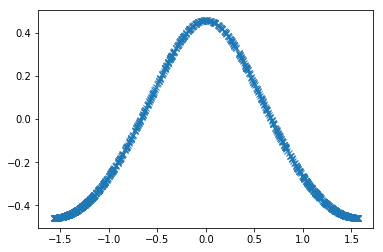

In [585]:
# def sumsq(x,)
with sess.as_default():
#     scale = pyutil.random_covmat()
#     scale = ((1,0),(0,1.5))
    scale = (1.,2.5)
#     .astype(np.float32)
    X = tf.random_uniform(shape=(20,40,2)).eval()
    t = test(scale=scale,)
    print (t.batch_shape)
    Y = t._z(X)
    x=  X.flat[-3:]
    y = Y.eval().flat[-3:]
    lp = t.log_prob(X).eval()
    tn = t.sample(10).eval()
    print (x, pyutil.msq(x))
    print (y, pyutil.msq(y) )
    print (t._log_unnormalized_prob(X).eval().shape)
    
    print ('[logProb]',)
    print (lp.shape)
    print (lp.flat[-3:])
    print (tn.shape)    
#     print (tn)
    
    print (pyutil.msq(tn.flat[-2:]))
    X1 = np.random.multivariate_normal((0,0),np.diag(scale),size=1000)
#     X1 = X1/np.linalg.norm(X1,axis=1,keepdims=1)
    X1 = X1.astype(np.float32)
    X1lp = t.log_prob(X1).eval()
#     X1lp = t._log_unnormalized_prob(X1).eval()
    print (X1.shape)
    print (t.scale.eval())
    print (X1lp.shape)
#     print (t.log_prob(X1))
#     print (t.event_shape_tensor().eval())

ts = np.arctan(X1.T[1]/X1.T[0])
plt.plot(ts,X1lp,'x')


In [609]:
K =1
D =2
data = X1
# scale = edm.Uniform(sample_shape=(D,D))
scale = edm.WishartFull(scale=np.eye(2,dtype=  np.float32),df=100,)
# scale.
# scale.covariance()
# print scale.dtype
# tf.as_dtype(scale)
# .astype('float32')
# scale = tf.transpose(scale) + scale
# m = tf.contrib.distributions.Mul
scale_diag = edm.Uniform(sample_shape=(D))
scale_perturb_factor = edm.Uniform(sample_shape=(D,1))

aNorm = type('test',(edm.RandomVariable,test),{})

# m = edm.Normal
# m = edm.MultivariateNormalDiagPlusLowRank(
#     loc=np.array((0.,)*D).astype(np.float32),
#     scale_diag =  scale_diag,
#     scale_perturb_factor =  scale_perturb_factor,    
#     sample_shape = len(data),
# )

# m = tf.contrib.distributions.Normal(
m = aNorm(
# m  = edm.Normal(
    loc=np.array((0.,)*D).astype(np.float32),
    scale =  scale_diag,
    sample_shape = len(data),

)


# name = self.name
i+=1
name = 'test%d'%i
try:
    tf.get_variable(name+'/test',[1])
    reuse = None
except:
    reuse = True
print (reuse)
self = pyutil.util_obj()
with tf.variable_scope(name, reuse=reuse):
#     self.q_pi = ed.models.PointMass(
#         tf.nn.softmax(
#             tf.get_variable("q_pi", [K])
#         )
#     )
#     self.q_mu = ed.models.PointMass(
#         tf.get_variable("q_mu", [K,D])
#     )
    self.q_scale_diag  = edm.PointMass(
        tf.nn.softplus(
            tf.get_variable('q_scale_diag',shape=[D])
                      ),
    )
    self.q_scale_perturb_factor = ed.models.PointMass(
        (
            tf.get_variable("q_scale_perturb_factor", [D,1])
        )
    )

# m = edm.MultivariateNormalFullCovariance(loc=np.array((0.,)*D).astype(np.float32),
#                                      covariance_matrix=scale,
#                                      sample_shape=len(data))
# q_scale = edm.PointMass(tf.get_variable(shape = (D,D),name='q_scale8'))
# ed.MAP
inf = ed.MAP({scale_diag:self.q_scale_diag,
#               scale_perturb_factor:self.q_scale_perturb_factor,
#               q_scale
             },{m:data})

/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:144: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


None


In [623]:
lst = 50,100,200,1000

n_iter = 50
# for n_iter in lst:
n_iter = 0
inf.run(n_iter = 1)
for _ in range(10):
    for _ in range(20):    
        i+=1;
        sess = tf.InteractiveSession()
        with sess.as_default():
            tf.global_variables_initializer().run()
    #         np.random.seed(i)
    #         tf.set_random_seed(i)
            ed.set_seed(i)
    #         n_iter += 50
            inf = ed.MAP({scale_diag:self.q_scale_diag,
            #               scale_perturb_factor:self.q_scale_perturb_factor,
            #               q_scale
                         },{m:data})
    #         [x.run() for x in inf.reset]
            inf.run(n_iter=n_iter)
            print (_, self.q_scale_diag.eval())
        break

/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:144: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


RuntimeError: Seeding is not supported after initializing part of the graph. Please move set_seed to the beginning of your code.

In [588]:
self.q_scale_diag.eval()

array([0.8059254 , 0.30373108], dtype=float32)

In [580]:
self.q_scale_diag.eval()

array([0.56893164, 0.5382173 ], dtype=float32)

In [564]:
self.q_scale_diag.eval()

array([0.8054905 , 0.80463034], dtype=float32)

In [566]:
self.q_scale_diag.eval()

array([0.48089033, 0.48037577], dtype=float32)

In [429]:
spf = self.q_scale_perturb_factor.eval()
np.dot(spf, spf.T) + np.diag(self.q_scale_diag.eval())
# q_scale.eval()

array([[ 1.0030543 , -0.01890513],
       [-0.01890513,  0.9850075 ]], dtype=float32)

In [35]:
import pymisca


In [37]:
sess = tf.Session()

In [51]:
t._batch_shape()

TensorShape([])

In [57]:
# sess = tf.get_default_session()
with sess.as_default():
    t = Normal(loc=(1.)*2,scale=(1.)*2,)
#     t.log_prob
    print (t.sample().eval())
# t._batch_shape()
# t.event_shape
t


-1.1444459
